In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import math

# Importing dataset
data_r = pd.read_csv(r"C:\Users\dirpr\OneDrive\Documentos\UE\MACHINE LEARNING\PROYECTO\DATA\alzheimers_disease_data.csv")
data = pd.DataFrame(data_r)

datan = data_r
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [224]:
# Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [225]:
# Taking out the not necessary columns

data.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)
data

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [226]:
# Show the numerical columns

numerical_columns = data.select_dtypes(include=["number"]).columns
numerical_columns


Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [227]:
# Replace the numerical categorical values with its categories

# Convert columns into string first

columns_to_convert = [
    'Ethnicity', 'Gender', 'EducationLevel', 'Smoking', 
    'FamilyHistoryAlzheimers', 'CardiovascularDisease', 
    'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
    'MemoryComplaints', 'BehavioralProblems', 'Confusion',
    'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
    'Forgetfulness', 'Diagnosis'
]

data[columns_to_convert] = data[columns_to_convert].astype(str)


# Replace it with the categories

data['Ethnicity'] = data['Ethnicity'].str.replace('0', 'Caucasian').str.replace('1', 'African american').str.replace('2', 'Asian').str.replace('3', 'Other')
data['Gender'] = data['Gender'].str.replace('0', 'Male').str.replace('1', 'Female')
data['EducationLevel'] = data['EducationLevel'].str.replace('0', 'None').str.replace('1', 'High School').str.replace('2', 'Bachelor').str.replace('3', 'Higher')
data['Smoking'] = data['Smoking'].str.replace('0', 'No').str.replace('1', 'Yes')
data['FamilyHistoryAlzheimers'] = data['FamilyHistoryAlzheimers'].str.replace('0', 'No').str.replace('1', 'Yes')
data['CardiovascularDisease'] = data['CardiovascularDisease'].str.replace('0', 'No').str.replace('1', 'Yes')
data['Diabetes'] = data['Diabetes'].str.replace('0', 'No').str.replace('1', 'Yes')
data['Depression'] = data['Depression'].str.replace('0', 'No').str.replace('1', 'Yes')
data['HeadInjury'] = data['HeadInjury'].str.replace('0', 'No').str.replace('1', 'Yes')
data['Hypertension'] = data['Hypertension'].str.replace('0', 'No').str.replace('1', 'Yes')
data['MemoryComplaints'] = data['MemoryComplaints'].str.replace('0', 'No').str.replace('1', 'Yes')
data['BehavioralProblems'] = data['BehavioralProblems'].str.replace('0', 'No').str.replace('1', 'Yes')
data['Confusion'] = data['Confusion'].str.replace('0', 'No').str.replace('1', 'Yes')
data['Disorientation'] = data['Disorientation'].str.replace('0', 'No').str.replace('1', 'Yes')
data['PersonalityChanges'] = data['PersonalityChanges'].str.replace('0', 'No').str.replace('1', 'Yes')
data['DifficultyCompletingTasks'] = data['DifficultyCompletingTasks'].str.replace('0', 'No').str.replace('1', 'Yes')
data['Forgetfulness'] = data['Forgetfulness'].str.replace('0', 'No').str.replace('1', 'Yes')
data['Diagnosis'] = data['Diagnosis'].str.replace('0', 'No').str.replace('1', 'Yes')

data



,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,Male,Caucasian,Bachelor,22.927749,No,13.297218,6.327112,1.347214,9.025679,...,6.518877,No,No,1.725883,No,No,No,Yes,No,No
1,89,Male,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,7.151293,...,7.118696,No,No,2.592424,No,No,No,No,Yes,No
2,73,Male,Other,High School,17.795882,No,19.555085,7.844988,1.826335,9.673574,...,5.895077,No,No,7.119548,No,Yes,No,Yes,No,No
3,74,Female,Caucasian,High School,33.800817,Yes,12.209266,8.428001,7.435604,8.392554,...,8.965106,No,Yes,6.481226,No,No,No,No,No,No
4,89,Male,Caucasian,None,20.716974,No,18.454356,6.310461,0.795498,5.597238,...,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,Male,Caucasian,High School,39.121757,No,1.561126,4.049964,6.555306,7.535540,...,0.238667,No,No,4.492838,Yes,No,No,No,No,Yes
2145,75,Male,Caucasian,Bachelor,17.857903,No,18.767261,1.360667,2.904662,8.555256,...,8.687480,No,Yes,9.204952,No,No,No,No,No,Yes
2146,77,Male,Caucasian,High School,15.476479,No,4.594670,9.886002,8.120025,5.769464,...,1.972137,No,No,5.036334,No,No,No,No,No,Yes
2147,78,Female,Other,High School,15.299911,No,8.674505,6.354282,1.263427,8.322874,...,5.173891,No,No,3.785399,No,No,No,No,Yes,Yes


In [228]:
# Show the numerical columns

numerical_columns = data.select_dtypes(include=["number"]).columns
print(f"Numerical columns: ", numerical_columns)

Numerical columns:  Index(['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'ADL'],
      dtype='object')


In [229]:
# Show the categorical columns

categorical_columns = data.columns.difference(numerical_columns)
print(f"Categorical columns: ", categorical_columns)


Categorical columns:  Index(['BehavioralProblems', 'CardiovascularDisease', 'Confusion',
       'Depression', 'Diabetes', 'Diagnosis', 'DifficultyCompletingTasks',
       'Disorientation', 'EducationLevel', 'Ethnicity',
       'FamilyHistoryAlzheimers', 'Forgetfulness', 'Gender', 'HeadInjury',
       'Hypertension', 'MemoryComplaints', 'PersonalityChanges', 'Smoking'],
      dtype='object')


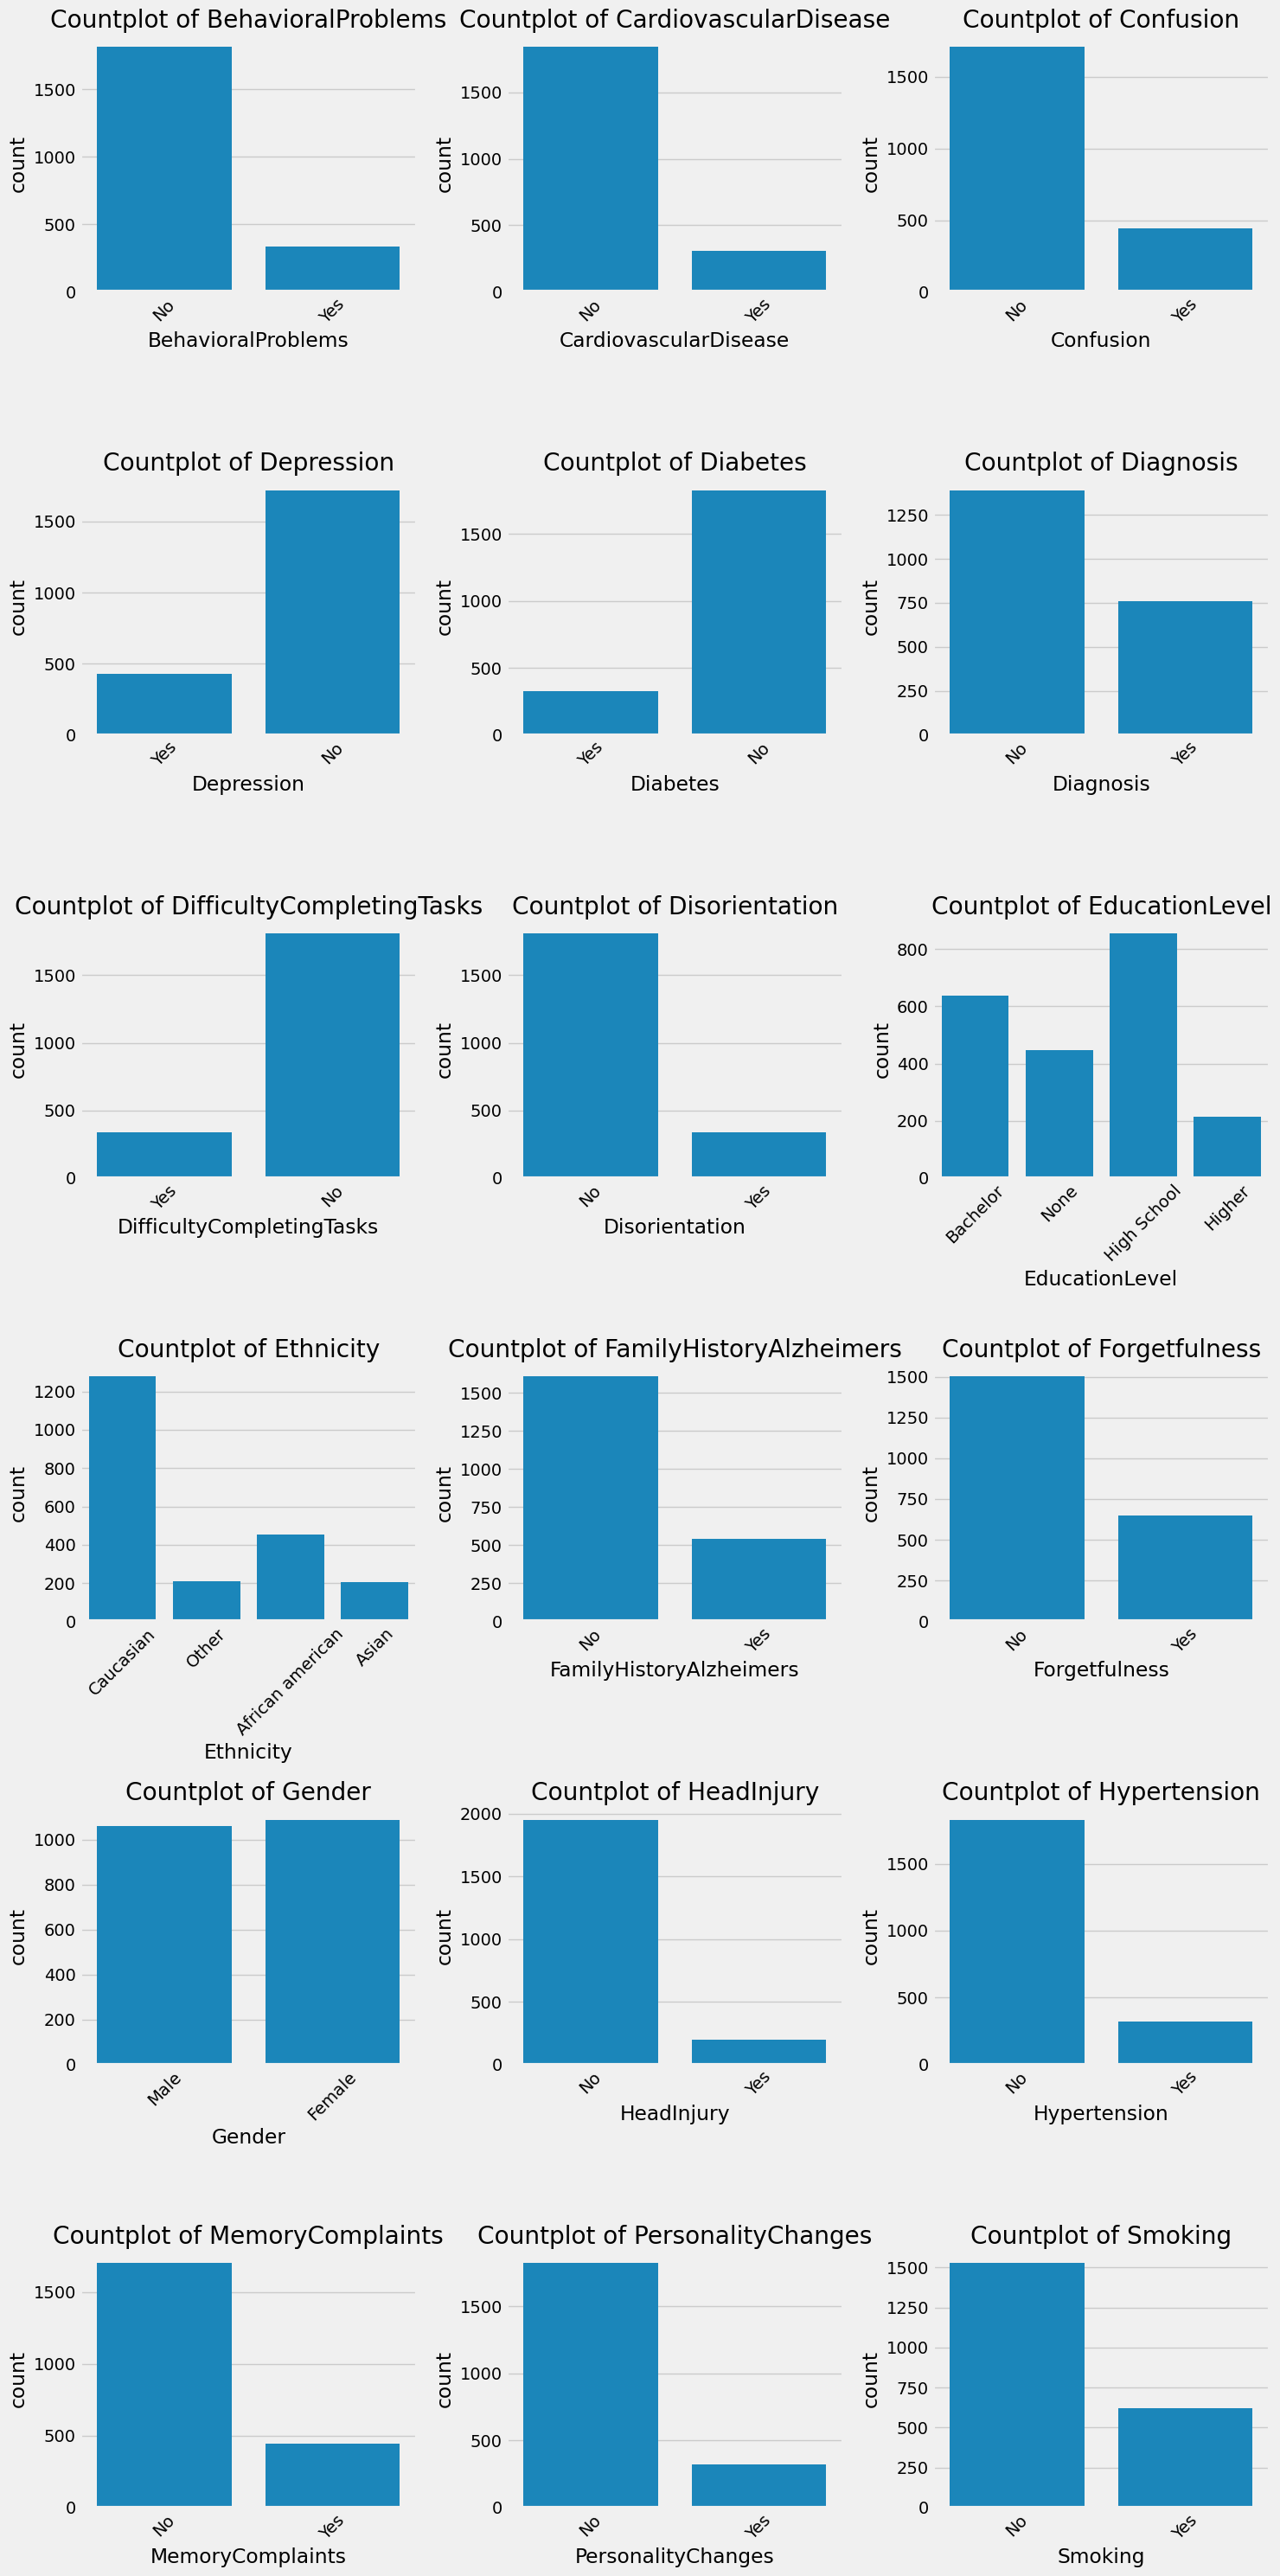

In [230]:
# Create subplots for all countplots

num_columns = 3  # Number of plots per row (adjust as needed)
num_rows = math.ceil(len(categorical_columns) / num_columns)  # Auto-adjust rows

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))  # Dynamic size
axes = axes.flatten()  # Flatten in case of a single row

for i, column in enumerate(categorical_columns):
    sns.countplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f'Countplot of {column}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots if the number of columns isn't a perfect multiple of num_columns
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Prevent overlap
plt.show()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


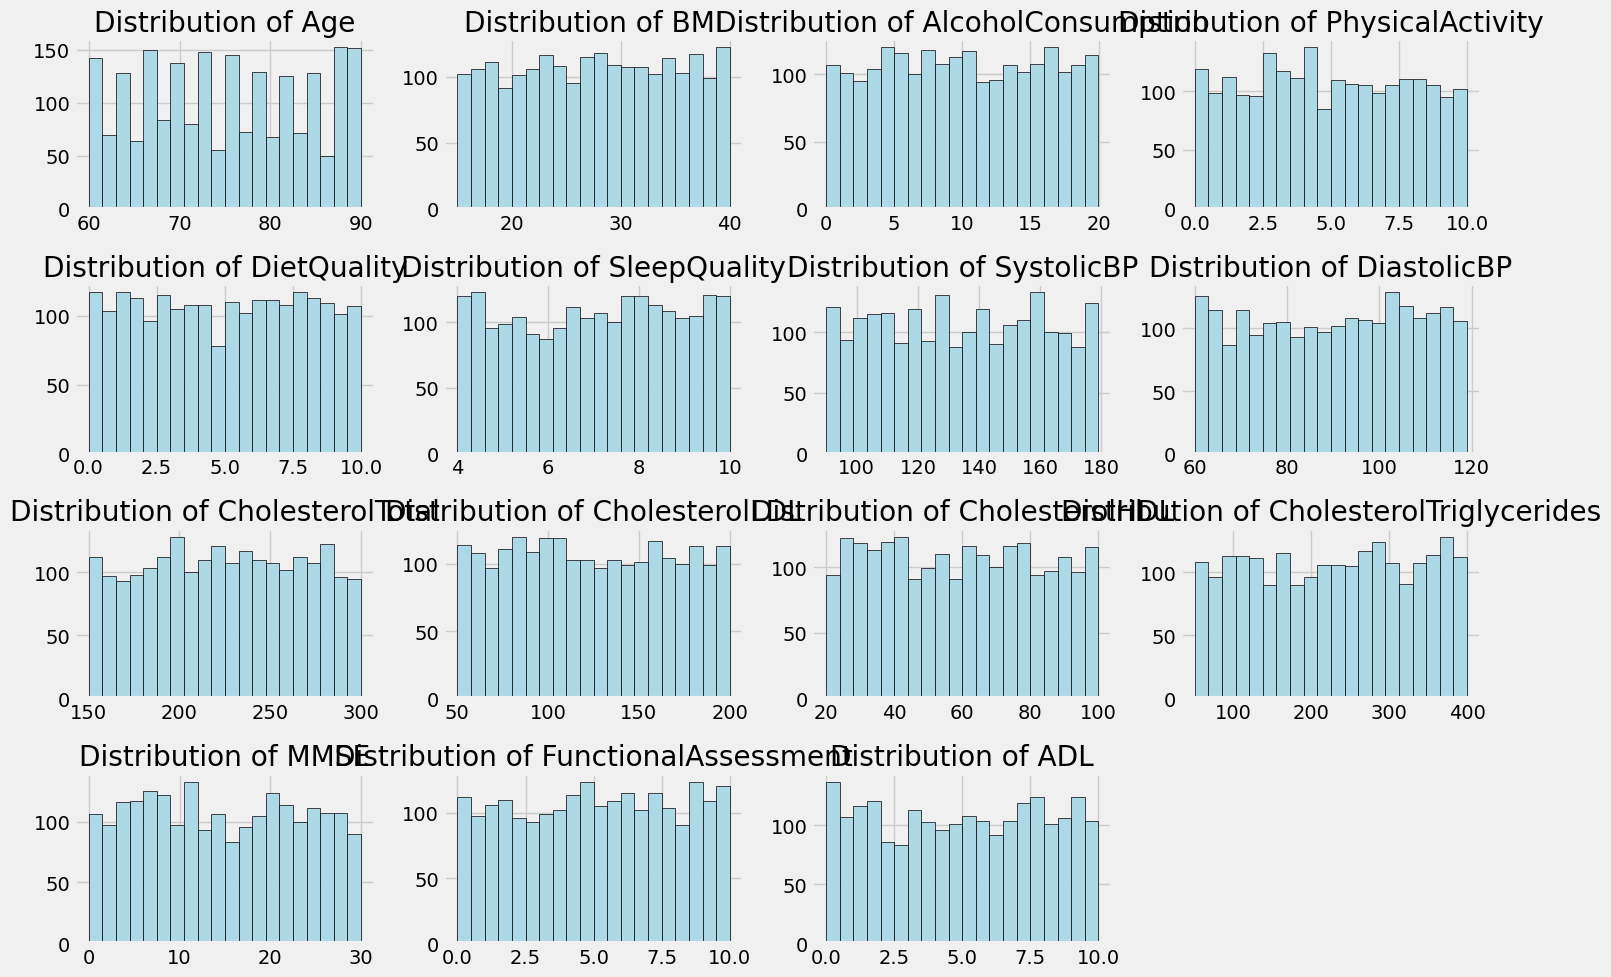

In [231]:
# Plot histogram for each numerical column

# change style: 

print(plt.style.available)

plt.style.use('fivethirtyeight')

# Extract the numerical columns
numerical_columns = data.select_dtypes(include=["number"]).columns

# Generate the histogram
graph = data[numerical_columns].hist(
    bins=20, figsize=(15, 10), color='lightblue', edgecolor='black'
)

# Flatten the axes array to iterate over it
axes = graph.flatten()

# Set custom titles
for ax, col in zip(axes, numerical_columns):
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

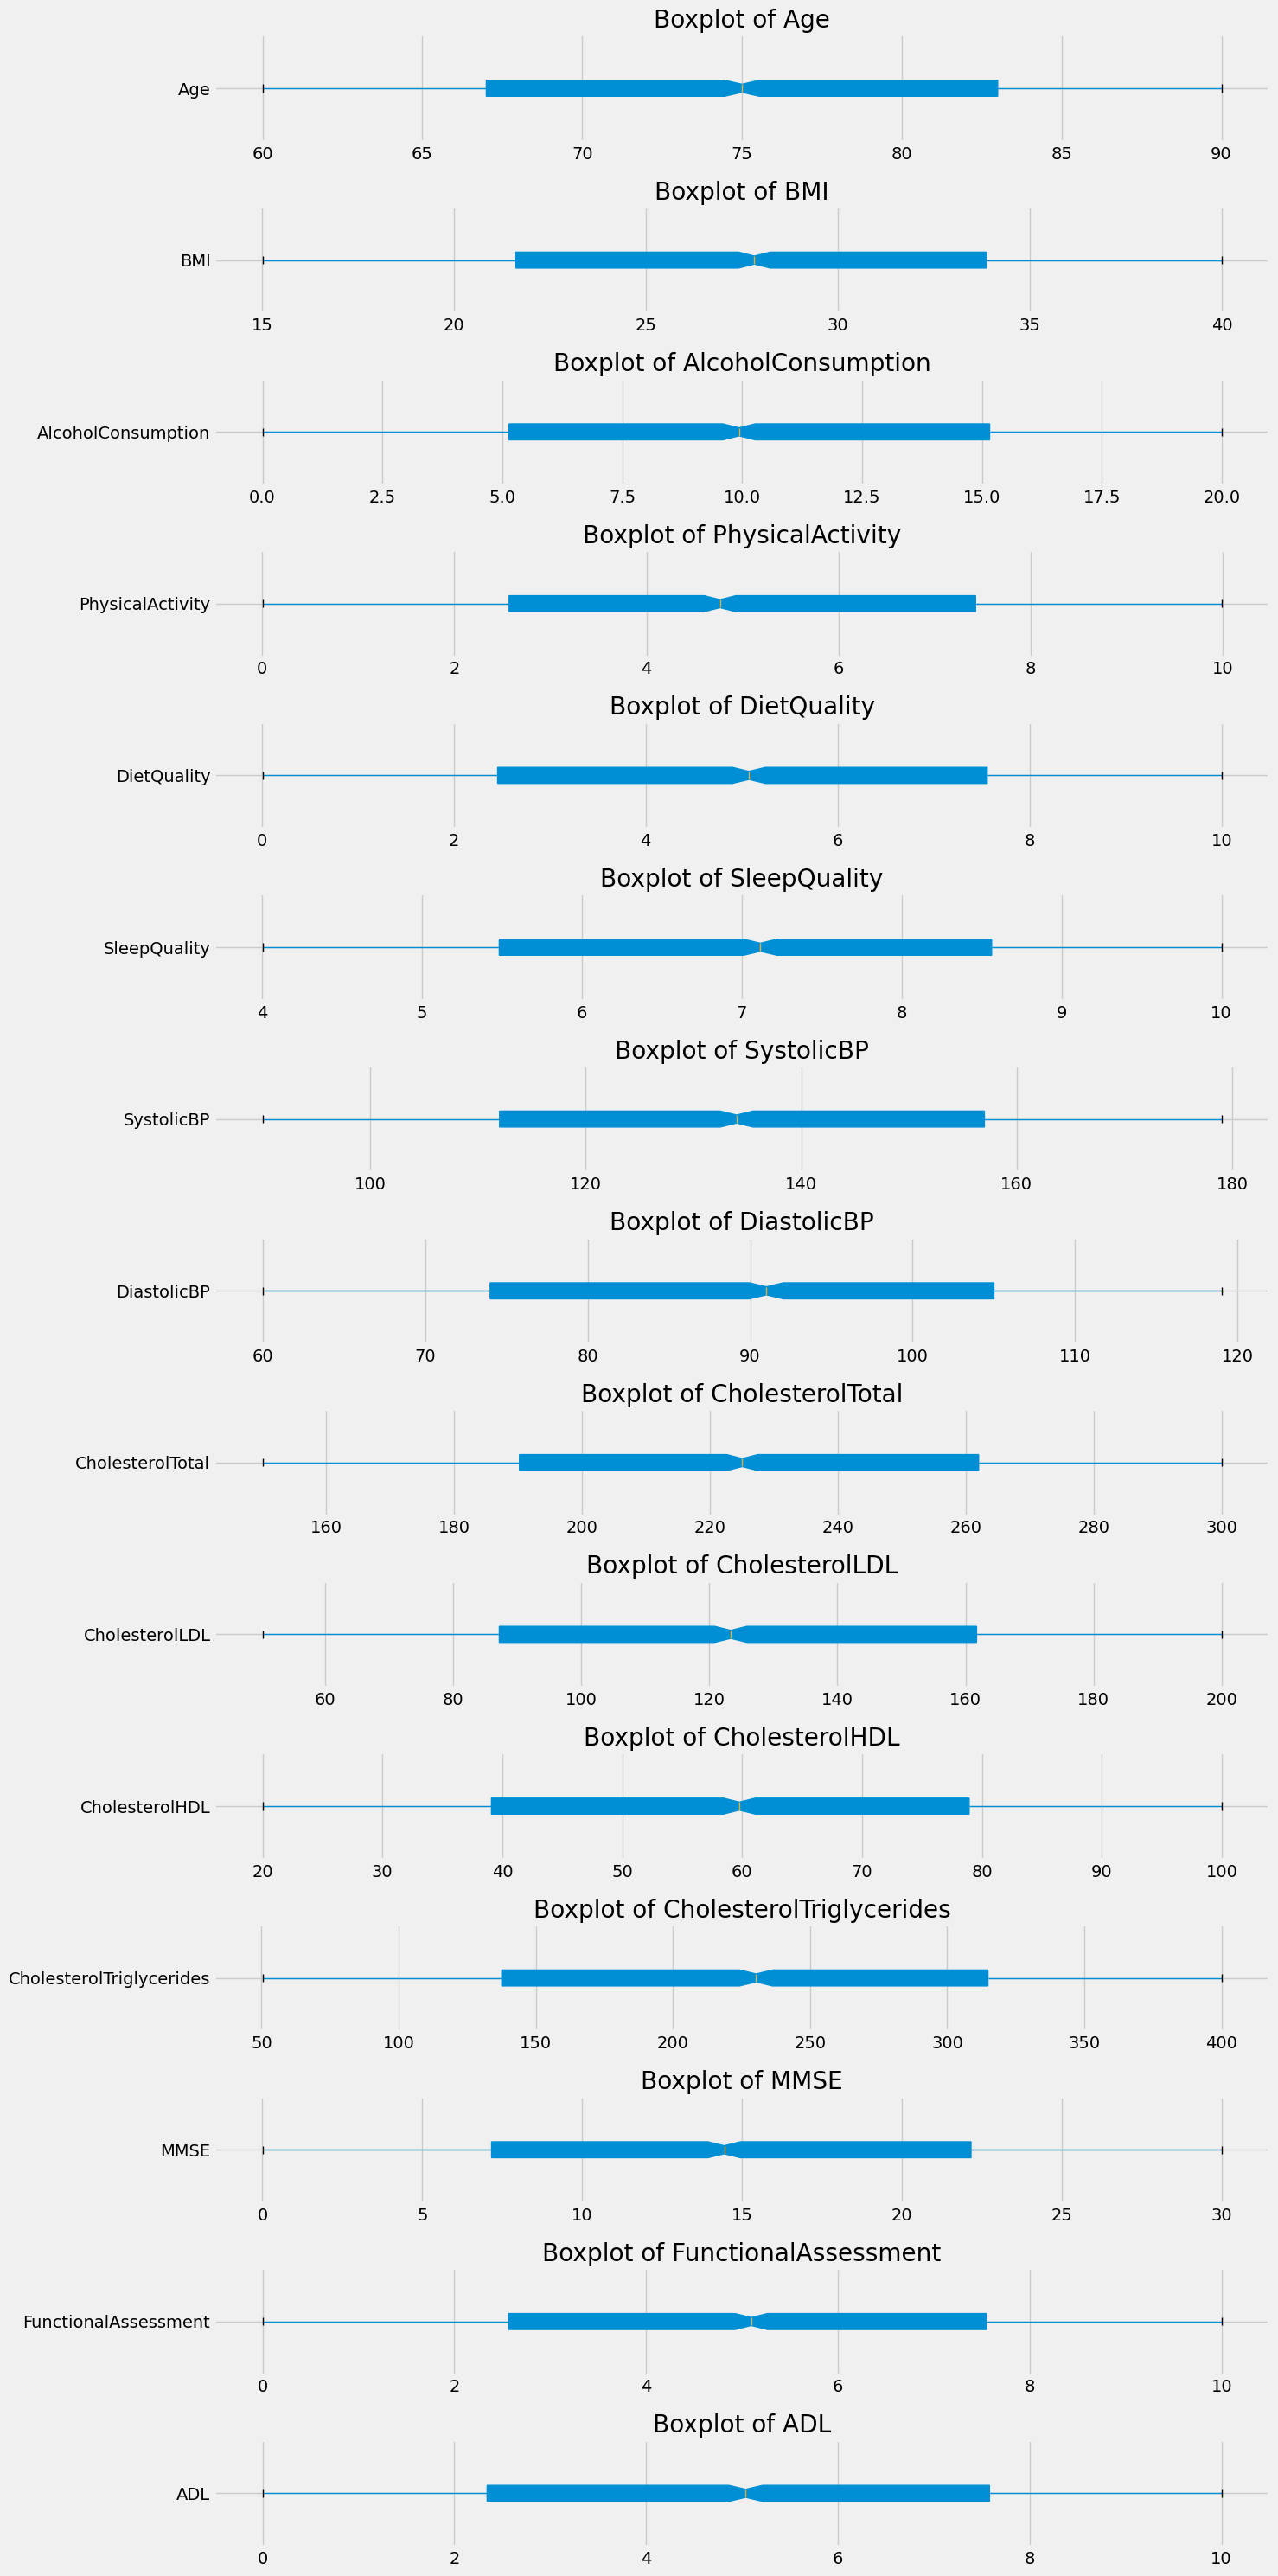

In [232]:
# Generate the boxplot graph

plt.figure(figsize=(15, len(numerical_columns) * 2))  # Adjust figsize as needed

# Create individual subplots for each variable
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    data.boxplot(column=column, vert=False, patch_artist=True, notch=True)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

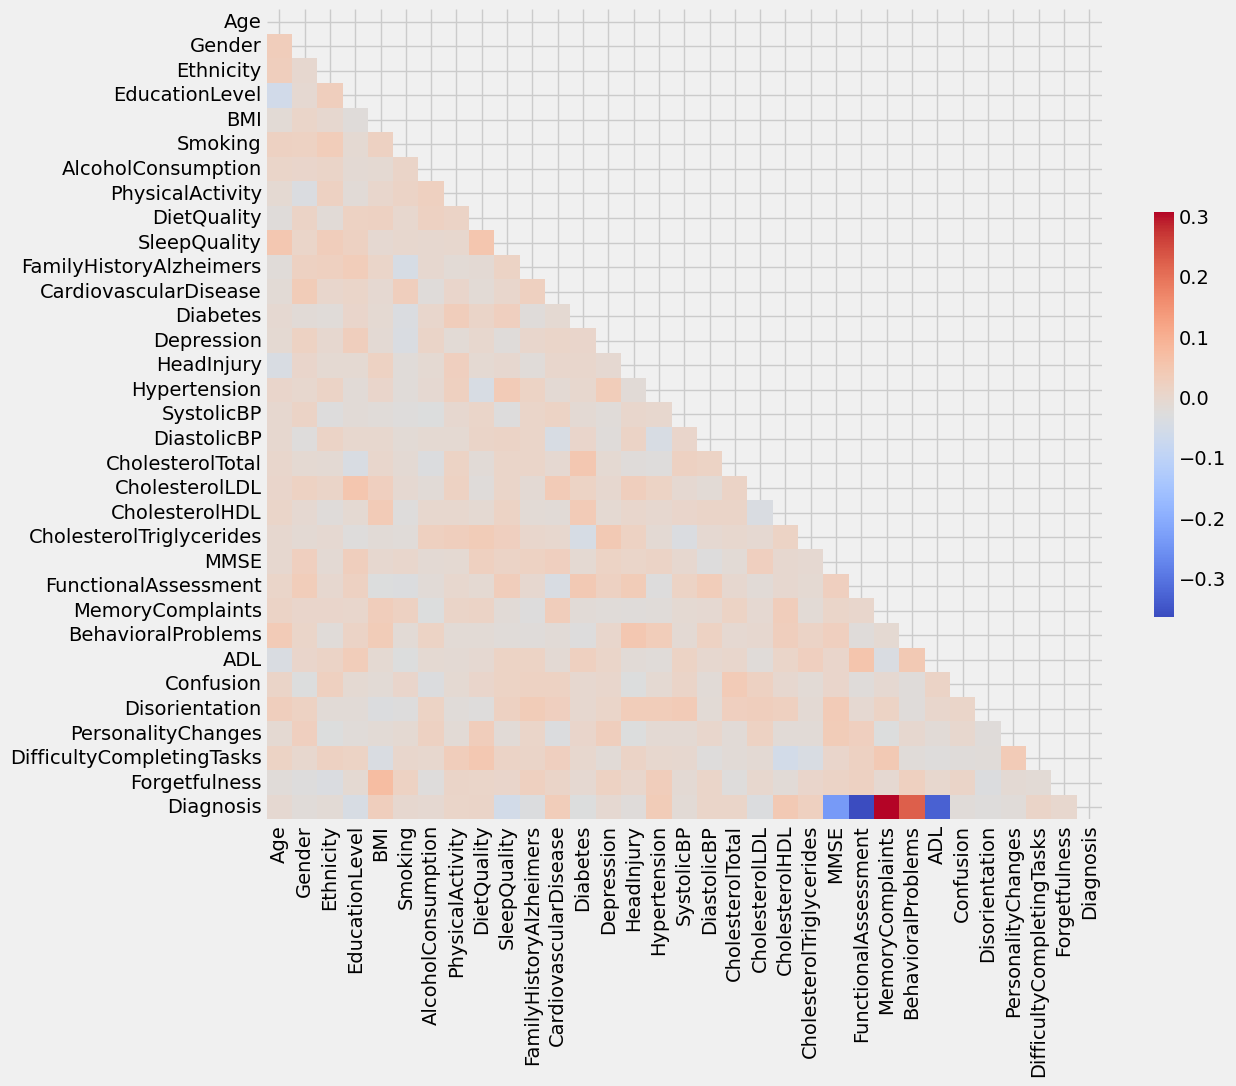

In [233]:
# Feature correlation
# Create a mask for the upper triangle
datan.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)
mask = np.triu(np.ones_like(datan.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(datan.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

In [234]:
data.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [248]:
# Convert categorical columns to dummy/one-hot encoded variables
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the resulting DataFrame
data_encoded.head()


,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,...,Ethnicity_Caucasian,Ethnicity_Other,FamilyHistoryAlzheimers_Yes,Forgetfulness_Yes,Gender_Male,HeadInjury_Yes,Hypertension_Yes,MemoryComplaints_Yes,PersonalityChanges_Yes,Smoking_Yes
0,73,22.927749,13.297218,6.327112,1.347214,9.025679,142,72,242.366840,56.150897,...,True,False,False,False,True,False,False,False,False,False
1,89,26.827681,4.542524,7.619885,0.518767,7.151293,115,64,231.162595,193.407996,...,True,False,False,True,True,False,False,False,False,False
2,73,17.795882,19.555085,7.844988,1.826335,9.673574,99,116,284.181858,153.322762,...,False,True,True,False,True,False,False,False,False,False
3,74,33.800817,12.209266,8.428001,7.435604,8.392554,118,115,159.582240,65.366637,...,True,False,False,False,False,False,False,False,False,True
4,89,20.716974,18.454356,6.310461,0.795498,5.597238,94,117,237.602184,92.869700,...,True,False,False,False,True,False,False,False,True,False


In [249]:
data_encoded['Diagnosis_Yes']


0       False
1       False
2       False
3       False
4       False
        ...  
2144     True
2145     True
2146     True
2147     True
2148    False
Name: Diagnosis_Yes, Length: 2149, dtype: bool

In [237]:
data_encoded.columns


Index(['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'ADL', 'BehavioralProblems_Yes',
       'CardiovascularDisease_Yes', 'Confusion_Yes', 'Depression_Yes',
       'Diabetes_Yes', 'Diagnosis_Yes', 'DifficultyCompletingTasks_Yes',
       'Disorientation_Yes', 'EducationLevel_High School',
       'EducationLevel_Higher', 'EducationLevel_None', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnicity_Other', 'FamilyHistoryAlzheimers_Yes',
       'Forgetfulness_Yes', 'Gender_Male', 'HeadInjury_Yes',
       'Hypertension_Yes', 'MemoryComplaints_Yes', 'PersonalityChanges_Yes',
       'Smoking_Yes'],
      dtype='object')

In [238]:
# Separate the features and output values
X = data_encoded.drop(columns = ['Diagnosis_Yes'])
y = data_encoded['Diagnosis_Yes']

# Initialize the scaler to make all the numerical columns 0-1
min_max_scaler = MinMaxScaler()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)

X_train = min_max_scaler.fit_transform(X_train) 
X_test = min_max_scaler.transform(X_test) 



In [239]:
y

0       False
1       False
2       False
3       False
4       False
        ...  
2144     True
2145     True
2146     True
2147     True
2148    False
Name: Diagnosis_Yes, Length: 2149, dtype: bool

In [240]:

# Define the neural network model using TensorFlow
model = Sequential([
    Dense(60, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)


C:\Users\dirpr\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6203 - loss: 0.6673 - val_accuracy: 0.6246 - val_loss: 0.6551
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6655 - loss: 0.5995 - val_accuracy: 0.6312 - val_loss: 0.6115
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7072 - loss: 0.5435 - val_accuracy: 0.7110 - val_loss: 0.5611
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7920 - loss: 0.4843 - val_accuracy: 0.7409 - val_loss: 0.5159
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8038 - loss: 0.4256 - val_accuracy: 0.7475 - val_loss: 0.4963
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8127 - loss: 0.4001 - val_accuracy: 0.7708 - val_loss: 0.4806
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8709 - loss: 0.3335 - val_accuracy: 0.7907 - val_loss: 0.4614
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8711 - loss: 0.3495 - val_accuracy: 0.7907 - val_loss

In [241]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)


Test Loss: 0.4612
Test Accuracy: 0.8062
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [242]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate a classification report to assess detailed performance
print(classification_report(y_test, predicted_classes))

# Confusion matrix to understand predictions
conf_matrix = confusion_matrix(y_test, predicted_classes)
print(conf_matrix)


              precision    recall  f1-score   support

       False       0.82      0.88      0.85       401
        True       0.78      0.68      0.73       244

    accuracy                           0.81       645
   macro avg       0.80      0.78      0.79       645
weighted avg       0.80      0.81      0.80       645

[[353  48]
 [ 77 167]]


In [243]:
# Calculate MSE manually

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 0.1398


In [250]:
# Test with one value

single_input = data_encoded.iloc[1500].drop('Diagnosis_Yes')

data_encoded.iloc[1500]


Age                                      77
BMI                               19.538408
AlcoholConsumption                  3.42606
PhysicalActivity                   1.530129
DietQuality                        9.917462
SleepQuality                       9.607987
SystolicBP                              175
DiastolicBP                              67
CholesterolTotal                  192.01399
CholesterolLDL                   163.573999
CholesterolHDL                    60.672395
CholesterolTriglycerides         171.713633
MMSE                              20.329456
FunctionalAssessment               3.846808
ADL                                7.051611
BehavioralProblems_Yes                False
CardiovascularDisease_Yes              True
Confusion_Yes                          True
Depression_Yes                         True
Diabetes_Yes                          False
Diagnosis_Yes                         False
DifficultyCompletingTasks_Yes         False
Disorientation_Yes              

In [245]:
# Scale the input using the same scaler used for training

single_input_d = single_input.to_frame().T
single_input_scaled = min_max_scaler.transform(single_input_d)

# Putting it in the model
prediction = model.predict(single_input_scaled)


# Interpret the result
predicted_class = (prediction > 0.5).astype(int)  # Assuming binary classification
print(f"Prediction Probability: {prediction[0][0]:.4f}")
print(f"Predicted Class: {'Diagnosis' if predicted_class[0][0] == 1 else 'No Diagnosis'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediction Probability: 0.2077
Predicted Class: No Diagnosis


In [251]:
# Generate random data to test

# Function to generate a random single record
def generate_random_records(num_records=50):
    records = []
    for _ in range(num_records):
        record = {
            "Age": random.randint(60, 90),  # Assuming age range is 60-90
            "Gender": random.choice(['Male', 'Female']),  # Assuming 0 = Male, 1 = Female
            "Ethnicity": random.choice(['Caucasian', 'African American' , 'Asian', 'Other']),  # Replace with actual ethnicity codes
            "EducationLevel": random.choice(['None', 'High School','Bachelor','Higher']),  # Assuming education level is categorical (0-3)
            "BMI": round(np.random.uniform(15, 40), 2),  # Assuming BMI range
            "Smoking": random.choice(['No', 'Yes']),  # 0 = Non-smoker, 1 = Smoker
            "AlcoholConsumption": round(np.random.uniform(0, 20), 2),  # Units per week
            "PhysicalActivity": round(np.random.uniform(0, 10), 2),  # Scale for activity level
            "DietQuality": round(np.random.uniform(0, 10), 2),  # Assuming a quality score
            "SleepQuality": round(np.random.uniform(4, 10), 2),  # Assuming a quality score
            "FamilyHistoryAlzheimers": random.choice(['No', 'Yes']),  # Assuming a quality score
            "CardiovascularDisease": random.choice(['No', 'Yes']),  # Assuming a quality score
            "Diabetes": random.choice(['No', 'Yes']),  # Assuming a quality score
            "Depression": random.choice(['No', 'Yes']),  # Assuming a quality score
            "HeadInjury": random.choice(['No', 'Yes']),
            "Hypertension": random.choice(['No', 'Yes']),
            "SystolicBP": round(np.random.uniform(90, 180), 2),
            "DiastolicBP": round(np.random.uniform(60, 120), 2),
            "CholesterolTotal": round(np.random.uniform(150, 300), 2),  # Assuming a quality score
            "CholesterolLDL": round(np.random.uniform(50, 200), 2),  # Assuming a quality score
            "CholesterolHDL": round(np.random.uniform(20, 100), 2),  # Assuming a quality score
            "CholesterolTriglycerides": round(np.random.uniform(50, 400), 2),  # Assuming a quality score
            "MMSE": round(np.random.uniform(0, 30), 2),  # Assuming a quality score
            "FunctionalAssessment": round(np.random.uniform(0, 10), 2),  # Assuming a quality score
            "MemoryComplaints": random.choice(['No', 'Yes']),
            "BehavioralProblems": random.choice(['No', 'Yes']),
            "ADL": round(np.random.uniform(0, 10), 2),  # Activities of Daily Living scale
            "Confusion": random.choice(['No', 'Yes']),
            "Disorientation": random.choice(['No', 'Yes']),
            "PersonalityChanges": random.choice(['No', 'Yes']),
            "DifficultyCompletingTasks": random.choice(['No', 'Yes']),
            "Forgetfulness": random.choice(['No', 'Yes']),
            "Diagnosis": random.choice(['No', 'Yes']),
        }
        records.append(record)
    return records

# Generate 3 random records
random_records = generate_random_records()

#random_records

# Convert to DataFrame
random_records_df = pd.DataFrame(random_records)
random_records_df

# Convert categorical columns to dummy/one-hot encoded variables
random_encoded = pd.get_dummies(random_records_df, columns=categorical_columns, drop_first=True)
random_encoded
# Choosing just one of the values

single_input_random = random_encoded.iloc[2].drop('Diagnosis_Yes')

random_encoded.iloc[2]

# Scale the input using the same scaler used for training

single_random_df = single_input_random.to_frame().T
single_random_df
single_random_scaled = min_max_scaler.transform(single_random_df)

# Putting it in the model
prediction = model.predict(single_random_scaled)


# Interpret the result
predicted_class = (prediction > 0.5).astype(int)  # Assuming binary classification
print(f"Prediction Probability: {prediction[0][0]:.4f}")
print(f"Predicted Class: {'Diagnosis' if predicted_class[0][0] == 1 else 'No Diagnosis'}")






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Prediction Probability: 0.9989
Predicted Class: Diagnosis


In [252]:
single_random_df

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,...,Ethnicity_Caucasian,Ethnicity_Other,FamilyHistoryAlzheimers_Yes,Forgetfulness_Yes,Gender_Male,HeadInjury_Yes,Hypertension_Yes,MemoryComplaints_Yes,PersonalityChanges_Yes,Smoking_Yes
2,85,24.95,8.62,0.21,5.84,6.32,142.95,111.35,279.03,134.27,...,False,True,True,True,True,True,True,True,True,True
